In [116]:
from scipy.stats import binom
import numpy as np

from empiricaldist import Pmf

import pandas as pd
import matplotlib.pyplot as plt

import random

Uma moeda justa terá 50% de probabilidade de cair em um lado se você rodar duas vezes terá 4 outcomes possiveis (todos com 25%).

* HH
* HT
* TH
* TT

Se pensarmos exclusivamente no H, temos três possibilidades: sair 0 (25%), sair 1(25%), sair 2 (50%)

In [117]:
#Simulação de um rolagem de duas moedas independentes e justas
lista = []
for i in range(0,1001):
    x = random.choices(['H','T'], k = 2)
    lista.append(x[0] + x[1])
    
df = pd.DataFrame(lista, columns=['roll'])
df['heads'] = 0
df.iloc[df[df['roll'].str.contains('H')].index,1] = 1
df.iloc[df[df['roll'].str.contains('HH')].index,1] = 2

In [118]:
pd.DataFrame(df.roll.value_counts(normalize = True))

,roll
TT,0.283716
HH,0.241758
HT,0.238761
TH,0.235764


In [119]:
pd.DataFrame(df.heads.value_counts(normalize = True,sort=False))

,heads
0,0.283716
1,0.474525
2,0.241758


In [120]:
#Rodando 2 moedas qual é chance de conseguirmos 1 caras (vale para coroa também)?
n = 2
p = 0.5
k = 1

binom.pmf(k,n,p)

0.5

In [121]:
#Rodando 2 moedas qual é chance de conseguirmos 2 caras(vale para coroa também)?
n = 2
p = 0.5
k = 2 

binom.pmf(k, n, p)

0.25

In [123]:
#Agora vamos passar 3 k diferentes, a chance de tirar 0,1,2 caras
ks = np.arange(n+1)

ps = binom.pmf(ks,n,p)

for outcome, prob in zip(ks,ps):
    print(f'{outcome}:{prob}')

0:0.25
1:0.5
2:0.25


In [124]:
#Usando a biblioteca Probability Mass Function
pmf_k = Pmf(ps,ks)
pmf_k

,probs
0,0.25
1,0.50
2,0.25


In [4]:
def make_binomial(n,p):
    """"Make a binomial Pmf."""
    ks = np.arange(n+1)
    ps = binom.pmf(ks,n,p)
    return Pmf(ps,ks)

## Moeda viciada?
When spun on edge 250 times, a Belgian one-euro coin came up heads 140 times and tails 110. “It looks very suspicious to me,” said Barry Blight, a statistics lecturer at the London School of Economics. “If the coin were unbiased, the chance of getting a result as extreme as that would be less than 7%.”

But do these data give evidence that the coin is biased rather than fair?

In [27]:
pmf_k = make_binomial(n=250, p=0.50)
#pmf_k = make_binomial(n=250, p=0.25)

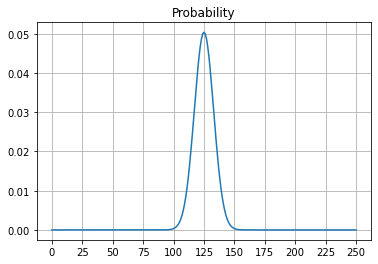

In [28]:
pmf_k.plot.line()
plt.title('Probability')
plt.grid()
plt.xticks(np.arange(0, 251, step=25))
plt.show()

In [22]:
#Resultado mais provavel
pmf_k.max_prob()

25

In [9]:
#Chance do resultado mais provavel acontecer
pmf_k[125]

0.05041221314731537

In [10]:
#Chance de rodar 140 caras
pmf_k[140]

0.008357181724917673

In [11]:
def prob_ge(pmf, threshold):
    """Probability of quantities greater than threshold"""
    ge = (pmf.qs >= threshold)
    total = pmf[ge].sum()
    return total

In [14]:
#A porcentagem que está acima do threshold
prob_ge(pmf_k, 140)

0.033210575620022706

In [82]:
#Já temos uma funçã nativa
pmf_k.prob_ge(140)

0.033210575620022706

Esse valor é abaixo do que doss 7% citado no enunciado, isso ocorre por que estamos olhando apenas uma cauda (a da direita) e o do enunciado soma as duas. Ou seja, todo resultado extremo.

In [86]:
#Aqui computamos o outro lado
pmf_k.prob_le(110)


0.033210575620022706

In [88]:
round(pmf_k.prob_ge(140) + pmf_k.prob_le(110),2)


0.07

### Segundo teste
Aqui vamos começar com uma prior 

In [81]:


 likelihood['H']



array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [68]:
hypos = np.linspace(0, 1, 101) #0.0 a 1.0
prior = Pmf(1, hypos) #1 para cada valor da hypos

likelihood_heads = hypos #Copiar o hypos aqui
likelihood_tails = 1 - hypos #Simplesmente inverte a ordem 

likelihood = {
    'H': likelihood_heads,
    'T': likelihood_tails
}

dataset = 'H' * 140 + 'T' * 110


In [69]:
def update_euro(pmf, dataset):
    """Update pmf with a given sequence of H and T."""
    for data in dataset:
        pmf *= likelihood[data]

    pmf.normalize()

In [70]:
posterior = prior.copy()
update_euro(posterior, dataset)

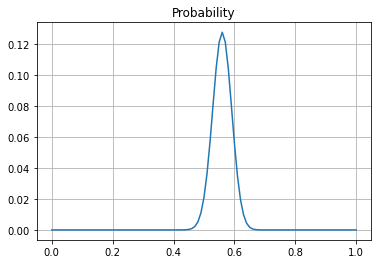

In [71]:
posterior.plot.line()
plt.title('Probability')
plt.grid()
plt.show()

### Repeteco